In [1]:
import sys
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# seaborn styling default
sns.set_theme(style='darkgrid')

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('derived_data/combined_dataset_2_filter.csv')
#df = df_raw[['Actiwatch activity counts', 'Apple Watch ENMO', 'fileName']]
df

,Unnamed: 0,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,ELMO_before,ELMO_after,fileName
0,28,01/01/2000 01:24:00,0.0,1.0,0.006943,0.006270,0.012221,P02_N1
1,29,01/01/2000 01:24:15,4.0,0.0,0.012221,0.006943,0.006598,P02_N1
2,30,01/01/2000 01:24:30,0.0,0.0,0.006598,0.012221,0.006625,P02_N1
3,31,01/01/2000 01:24:45,0.0,0.0,0.006625,0.006598,0.006931,P02_N1
4,32,01/01/2000 01:25:00,0.0,0.0,0.006931,0.006625,0.006734,P02_N1
...,...,...,...,...,...,...,...,...
40655,1326,27/01/2000 04:15:30,0.0,0.0,0.004925,0.005095,0.004991,P17_N1
40656,1327,27/01/2000 04:15:45,0.0,0.0,0.004991,0.004925,0.004935,P17_N1
40657,1328,27/01/2000 04:16:00,0.0,0.0,0.004935,0.004991,0.004983,P17_N1
40658,1329,27/01/2000 04:16:15,0.0,0.0,0.004983,0.004935,0.005274,P17_N1


In [3]:
df = df.dropna()

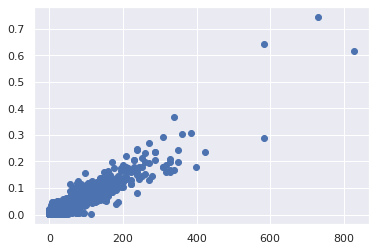

In [27]:
plt.scatter(df['Actiwatch activity counts'], df['Apple Watch ENMO'])

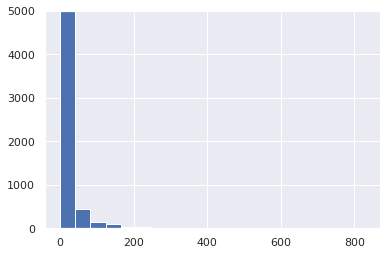

In [56]:

n_bins = 20

# Generate two normal distributions
dist1 = df['Actiwatch activity counts']
plt.ylim(0,5000)
plt.hist(dist1, bins = n_bins)
plt.show()

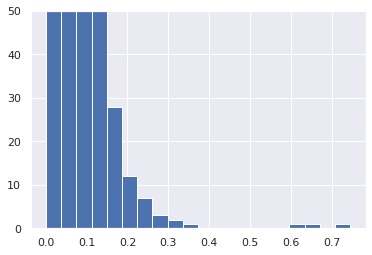

In [6]:
n_bins = 20

# Generate two normal distributions
dist1 = df['Apple Watch ENMO']
plt.ylim(0,50)
plt.hist(dist1, bins = n_bins)
plt.show()

In [7]:
#df2 = df.dropna()
nums = df.to_numpy()

In [8]:
nums

array([[0.0, 0.006943397, 'P02_N1'],
       [4.0, 0.01222079, 'P02_N1'],
       [0.0, 0.006598491, 'P02_N1'],
       ...,
       [0.0, 0.004934795, 'P17_N1'],
       [0.0, 0.0049826670000000005, 'P17_N1'],
       [0.0, 0.0052735690000000005, 'P17_N1']], dtype=object)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(nums[:, 1], nums[:, 0], test_size=0.33, random_state=42)

In [89]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

(0.0, 0.05)

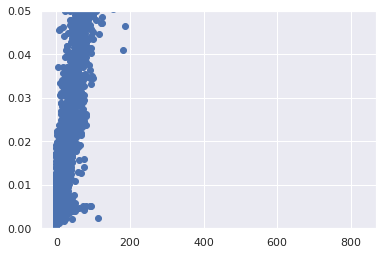

In [11]:
plt.scatter(nums[:, 0], nums[:, 1])
plt.ylim(0,.05)

In [12]:
print("Size of train X " + str(X_train.size) + " Y " + str(y_train.size) )
print("Size of test X " + str(X_test.size) + " Y " + str(y_test.size) )
print("Total size " + str(nums.size))

Size of train X 27240 Y 27240
Size of test X 13418 Y 13418
Total size 121974


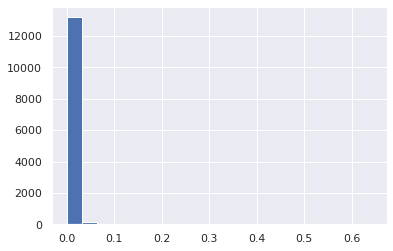

In [13]:

n_bins = 20

# Generate two normal distributions
dist1 = X_test
#plt.ylim(0,50)
plt.hist(dist1, bins = n_bins)
plt.show()

In [14]:
#fit linear regression
coef = np.polyfit(X_train,y_train,1)
poly1d_fn = np.poly1d(coef) 

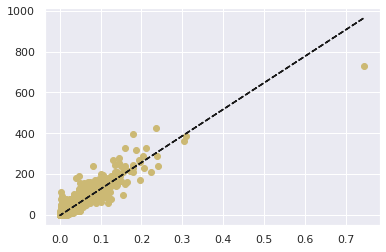

In [15]:
plt.plot(X_train,y_train, 'yo', X_train, poly1d_fn(X_train), '--k')

In [16]:
#display x and y
poly1d_fn.coef

array([1300.06557841,   -3.70231548])

array([0.00284779])

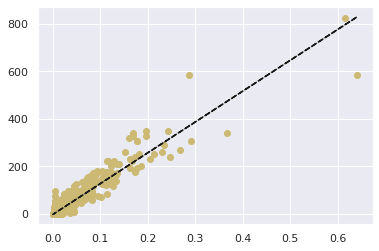

In [17]:
plt.plot(X_test,y_test, 'yo', X_test, poly1d_fn(X_test), '--k')

In [76]:
from sklearn.linear_model import PoissonRegressor
model = PoissonRegressor()
XX_train = X_train.reshape(-1, 1)
model.fit(XX_train, y_train)

PoissonRegressor()

In [77]:
model.score(XX_train, y_train)

TypeError: ufunc 'xlogy' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [20]:
model.coef_

array([0.17413661])

In [21]:
pd.DataFrame(
    {"pred": model.predict(XX_train),
    "actual": y_train}
)

,pred,actual
0,2.328344,0.0
1,2.327618,0.0
2,2.327624,0.0
3,2.328051,0.0
4,2.327596,0.0
...,...,...
27235,2.328179,0.0
27236,2.328453,0.0
27237,2.329075,0.0
27238,2.328173,0.0


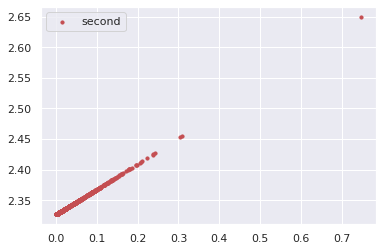

In [22]:


fig = plt.figure()
ax1 = fig.add_subplot(111)

#ax1.scatter(df['Apple Watch ENMO'] ,df['Actiwatch activity counts'], s=10, c='b', marker="s", label='first')
ax1.scatter(X_train,model.predict(XX_train), s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left')
plt.show()

In [90]:
#zero inflated poisson regressio,n
zip_model = sm.ZeroInflatedPoisson(X_train, y_train, missing="drop")
zip_res = zip_model.fit()

Optimization terminated successfully.
         Current function value: 0.972539
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25


In [91]:
zip_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                       y   No. Observations:                27240
Model:             ZeroInflatedPoisson   Df Residuals:                    27239
Method:                            MLE   Df Model:                            0
Date:                 Mon, 03 Oct 2022   Pseudo R-squ.:                  -35.01
Time:                         15:29:05   Log-Likelihood:                -26492.
converged:                        True   LL-Null:                       -735.66
Covariance Type:             nonrobust   LLR p-value:                       nan
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -13.9408      6.451     -2.161      0.031     -26.584      -1.298
x1               -0.0591      0.003    -19.137      0.000      -0.065      -0.053
=================================================================================
"""

Trying to reduce number of zeros


In [4]:
rounding_index = 3
df_rounded = df.copy()
df_rounded['Apple Watch ENMO'] = df['Apple Watch ENMO'].round(rounding_index)
df_rounded['ELMO_before'] = df['ELMO_before'].round(rounding_index)
df_rounded['ELMO_after'] = df['ELMO_after'].round(rounding_index)
#nums_rounded = df.to_numpy()

In [5]:
df_rounded = df_rounded.dropna()

In [6]:
df_rounded

,Unnamed: 0,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,ELMO_before,ELMO_after,fileName
0,28,01/01/2000 01:24:00,0.0,1.0,0.007,0.006,0.012,P02_N1
1,29,01/01/2000 01:24:15,4.0,0.0,0.012,0.007,0.007,P02_N1
2,30,01/01/2000 01:24:30,0.0,0.0,0.007,0.012,0.007,P02_N1
3,31,01/01/2000 01:24:45,0.0,0.0,0.007,0.007,0.007,P02_N1
4,32,01/01/2000 01:25:00,0.0,0.0,0.007,0.007,0.007,P02_N1
...,...,...,...,...,...,...,...,...
40655,1326,27/01/2000 04:15:30,0.0,0.0,0.005,0.005,0.005,P17_N1
40656,1327,27/01/2000 04:15:45,0.0,0.0,0.005,0.005,0.005,P17_N1
40657,1328,27/01/2000 04:16:00,0.0,0.0,0.005,0.005,0.005,P17_N1
40658,1329,27/01/2000 04:16:15,0.0,0.0,0.005,0.005,0.005,P17_N1


In [7]:
#df_rounded = df_rounded.drop_duplicates()
#df_x_rounded = df_rounded[['Apple Watch ENMO']].copy()
df_x_rounded = df_rounded[['Apple Watch ENMO', 'ELMO_before','ELMO_after']].copy()
df_y_rounded = df_rounded[['Actiwatch activity counts']].copy()
nums_rounded_x = df_x_rounded.to_numpy()
nums_rounded_y = df_y_rounded.to_numpy()

In [8]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(nums_rounded_x, nums_rounded_y, test_size=0.33, random_state=42)
X_trainR = X_trainR.astype('float64')
y_trainR = y_trainR.astype('int')
X_testR = X_testR.astype('float64')
y_testR = y_testR.astype('int')

In [9]:
y_testR

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model = LinearRegression().fit(X_trainR, y_trainR)

In [110]:
r_sq = model.score(X_testR, y_testR)
print(f"coefficient of determination: {r_sq}")
#0.888669565805582

coefficient of determination: 0.888669565805582


In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [15]:
regressor.fit(X_trainR, y_trainR) 

RandomForestRegressor(random_state=0)

In [17]:
r_sq_2 = regressor.score(X_trainR, y_trainR)
print(f"coefficient of determination: {r_sq_2}")

coefficient of determination: 0.977306930748169


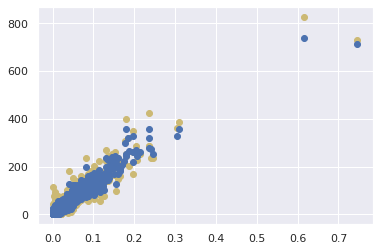

In [18]:

plt.plot(X_trainR[:, 0],y_trainR, 'yo', X_trainR[:, 0],regressor.predict(X_trainR), 'bo')

In [157]:
regressor.predict(X_testR).astype('int')

array([0, 0, 0, ..., 2, 0, 0])

Test on patient

In [120]:
import_df = pd.read_csv('derived_data/P02_N1_filtered.csv')

In [121]:
import_df

,Unnamed: 0,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,ELMO_before,ELMO_after
0,1,01/01/2000 01:17:15,NaN,NaN,0.002960,0.003123,0.002921
1,2,01/01/2000 01:17:30,NaN,NaN,0.002921,0.002960,0.002907
2,3,01/01/2000 01:17:45,NaN,NaN,0.002907,0.002921,0.002932
3,4,01/01/2000 01:18:00,NaN,NaN,0.002932,0.002907,0.002989
4,5,01/01/2000 01:18:15,NaN,NaN,0.002989,0.002932,0.002895
...,...,...,...,...,...,...,...
1524,1525,01/01/2000 07:38:15,NaN,NaN,0.009588,0.031224,0.008137
1525,1526,01/01/2000 07:38:30,NaN,NaN,0.008137,0.009588,0.007895
1526,1527,01/01/2000 07:38:45,NaN,NaN,0.007895,0.008137,0.008153
1527,1528,01/01/2000 07:39:00,NaN,NaN,0.008153,0.007895,0.008433


In [122]:
test_df = import_df[['Apple Watch ENMO','ELMO_before','ELMO_after']].copy()

In [123]:
test_nums = test_df.to_numpy()
test_nums

array([[0.00295982, 0.00312263, 0.00292132],
       [0.00292132, 0.00295982, 0.00290699],
       [0.00290699, 0.00292132, 0.00293243],
       ...,
       [0.00789527, 0.00813657, 0.0081535 ],
       [0.0081535 , 0.00789527, 0.00843327],
       [0.00843327, 0.0081535 , 0.00796823]])

In [124]:
predict = gnb.predict(test_nums).astype('int')

In [125]:
import_df['predicted_actiwatch']= predict

In [126]:
import_df.head(30)

,Unnamed: 0,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,ELMO_before,ELMO_after,predicted_actiwatch
0,1,01/01/2000 01:17:15,NaN,NaN,0.002960,0.003123,0.002921,0
1,2,01/01/2000 01:17:30,NaN,NaN,0.002921,0.002960,0.002907,0
2,3,01/01/2000 01:17:45,NaN,NaN,0.002907,0.002921,0.002932,0
3,4,01/01/2000 01:18:00,NaN,NaN,0.002932,0.002907,0.002989,0
4,5,01/01/2000 01:18:15,NaN,NaN,0.002989,0.002932,0.002895,0
5,6,01/01/2000 01:18:30,NaN,NaN,0.002895,0.002989,0.002916,0
6,7,01/01/2000 01:18:45,NaN,NaN,0.002916,0.002895,0.002746,0
7,8,01/01/2000 01:19:00,NaN,NaN,0.002746,0.002916,0.038737,2
8,9,01/01/2000 01:19:15,NaN,NaN,0.038737,0.002746,0.065249,94
9,10,01/01/2000 01:19:30,NaN,NaN,0.065249,0.038737,0.057662,64


Implement algorithm

In [127]:
for index, row in import_df.iterrows():
    if index <= 8 or index >= len(import_df.index)-8:
        continue

    #part 1
    p1 = 0
    for i in range(-8,-4):
        j = index + i
        p1 = p1 + import_df.loc[j]['predicted_actiwatch']

    #part 2
    p2 = 0
    for i in range(-4,0):
        j = index + i
        p2 = p2 + import_df.loc[j]['predicted_actiwatch']

    #part 3
    p3 = 0
    for i in range(1,5):
        j = index + i
        p3 = p3 + import_df.loc[j]['predicted_actiwatch']

    #part 4
    p4 = 0
    for i in range(5,9):
        j = index + i
        p4 = p4 + import_df.loc[j]['predicted_actiwatch']

    #Calculate total counts
    import_df.at[index, 'total_counts'] = 0.04*p1 + 0.2*p2 + 4*import_df.loc[index]['predicted_actiwatch'] + 0.2*p3 + 0.04*p4



In [128]:
def predict_sleep_awake(row):
    if row['total_counts'] <= 20:
        return 0
    else:
        return 1


    

In [129]:
import_df['predicted_sleep'] = import_df.apply (lambda row: predict_sleep_awake(row), axis=1)

In [130]:
import_df.head(40)

,Unnamed: 0,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,ELMO_before,ELMO_after,predicted_actiwatch,total_counts,predicted_sleep
0,1,01/01/2000 01:17:15,NaN,NaN,0.002960,0.003123,0.002921,0,NaN,1
1,2,01/01/2000 01:17:30,NaN,NaN,0.002921,0.002960,0.002907,0,NaN,1
2,3,01/01/2000 01:17:45,NaN,NaN,0.002907,0.002921,0.002932,0,NaN,1
3,4,01/01/2000 01:18:00,NaN,NaN,0.002932,0.002907,0.002989,0,NaN,1
4,5,01/01/2000 01:18:15,NaN,NaN,0.002989,0.002932,0.002895,0,NaN,1
5,6,01/01/2000 01:18:30,NaN,NaN,0.002895,0.002989,0.002916,0,NaN,1
6,7,01/01/2000 01:18:45,NaN,NaN,0.002916,0.002895,0.002746,0,NaN,1
7,8,01/01/2000 01:19:00,NaN,NaN,0.002746,0.002916,0.038737,2,NaN,1
8,9,01/01/2000 01:19:15,NaN,NaN,0.038737,0.002746,0.065249,94,NaN,1
9,10,01/01/2000 01:19:30,NaN,NaN,0.065249,0.038737,0.057662,64,354.16,1


Check accuracy

In [131]:
#sleep is zero, awake is one
df_accuracy = import_df.dropna(subset=['Actiware classification']).copy()

In [132]:
TP=0
TN=0
FP=0
FN=0

for index, row in df_accuracy.iterrows():
    if row['Actiware classification'] == 1 and row['predicted_sleep'] == 1:
        TN+=1
    if row['Actiware classification'] == 1 and row['predicted_sleep'] == 0:
        FP+=1
    if row['Actiware classification'] == 0 and row['predicted_sleep'] == 0:
        TP+=1
    if row['Actiware classification'] == 0 and row['predicted_sleep'] == 1:
        FN+=1



In [133]:
accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
print(str(round(accuracy,2)) + '%')

94.56%


Random Forest: 95.95%
Naive Bayes: 94.56%

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
gnb = GaussianNB()

In [118]:
gnb.fit(X_trainR, y_trainR)


GaussianNB()

In [119]:
r_sq_3 = gnb.score(X_testR, y_testR)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.9253931579339644


In [98]:
from sklearn import svm

In [99]:
regr = svm.SVR()
regr.fit(X_trainR, y_trainR)

SVR()

In [100]:
r_sq_4 = regr.score(X_testR, y_testR)
print(f"coefficient of determination: {r_sq_4}")

coefficient of determination: 0.40943126425264653


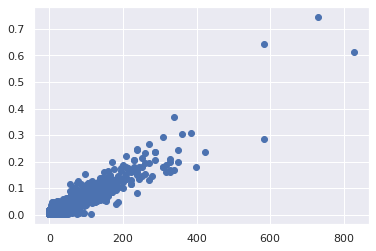

In [157]:
plt.scatter(nums_rounded[:, 0], nums_rounded[:, 1])
#plt.ylim(0,.05)

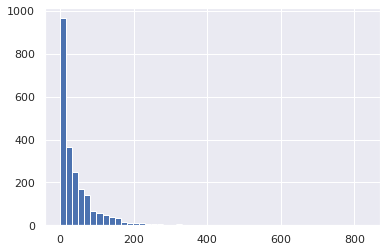

In [158]:
n_bins = 50

# Generate two normal distributions
dist1 = df_rounded['Actiwatch activity counts']
#plt.ylim(0,2000)
plt.hist(dist1, bins = n_bins)
plt.show()

In [61]:
model = PoissonRegressor()
XX_trainR = X_trainR.reshape(-1, 1)
model.fit(XX_trainR, y_trainR)

NameError: name 'PoissonRegressor' is not defined

In [146]:
model.score(XX_trainR, y_trainR)

0.05335999192111607

In [63]:
import statsmodels.api as sm

In [65]:
XX_trainR = X_trainR.reshape(-1, 1)

In [66]:
#zero inflated poisson regressio,n
zip_model = sm.ZeroInflatedPoisson(endog=y_trainR, exog=X_trainR, exog_infl=X_trainR, inflation='logit',missing="drop")
zip_res = zip_model.fit()

         Current function value: 5.991643
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41


In [67]:
zip_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                       y   No. Observations:                27239
Model:             ZeroInflatedPoisson   Df Residuals:                    27236
Method:                            MLE   Df Model:                            2
Date:                 Mon, 03 Oct 2022   Pseudo R-squ.:                  -2.225
Time:                         20:06:44   Log-Likelihood:            -1.6321e+05
converged:                       False   LL-Null:                       -50610.
Covariance Type:             nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
inflate_x1    -6.6195      1.577     -4.198      0.000      -9.710      -3.529
inflate_x2    21.5489      2.229      9.669      0.000      17.181      25.917
inflate_x3    33.4914      2.744     12.204      0.000      28.113      38.870
x1             8.2297      0.038    215.398      0.000       8.155       8.305
x2             4.1378      0.076     54.100      0.000       3.988       4.288
x3            10.9729      0.040    270.992      0.000      10.894      11.052
==============================================================================
"""

In [7]:
from pyts.classification import TimeSeriesForest
from pyts.datasets import load_gunpoint
from pyts.classification import TSBF

In [19]:
x = nums_rounded[:, 1].reshape(-1, 1).astype('float64')

In [38]:
y

array([0., 4., 0., ..., 0., 0., 0.])

In [33]:
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

In [20]:
y= nums_rounded[:, 0].astype('float64')

In [22]:
clf = TimeSeriesForest(random_state=43)

In [23]:
clf.fit(x, y)



ValueError: low >= high

In [19]:
clf.score(X_test, y_test)

0.9733333333333334